In [1]:
# Day 1-2: 向量基礎教學與實作
# 機器學習數學基礎

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 設定中文字體
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

print("=== Day 1-2: 向量基礎教學 ===\n")

# ==========================================
# 1. 向量的建立和基本屬性
# ==========================================

=== Day 1-2: 向量基礎教學 ===



### 學習線性代數或是深度學習的數學運算時，經常需要對高維度的向量、矩陣進行運算。
- 純量 (Scalar) 屬於 0 維
- 向量 (Vector) 屬於 1 維
- 矩陣 (Matrix) 屬於 2 維度
- 超過 3 維就統稱為張量 (Tensor), (當然 Scalar、Vector 與 Matrix 也都可以視為 Tensor）


2D向量: [3 4]
3D向量: [1 2 3]
特徵向量 [價格, 評分, 銷量]: [ 299.     4.5 2000. ]
1d向量維度: 1

2D向量維度:1
2D向量長度: 2
2D向量形狀: (2,)

3D向量維度:1
3D向量長度: 3
3D向量形狀: (3,)


2. 向量加法
------------------------------
a + b = [4 6]


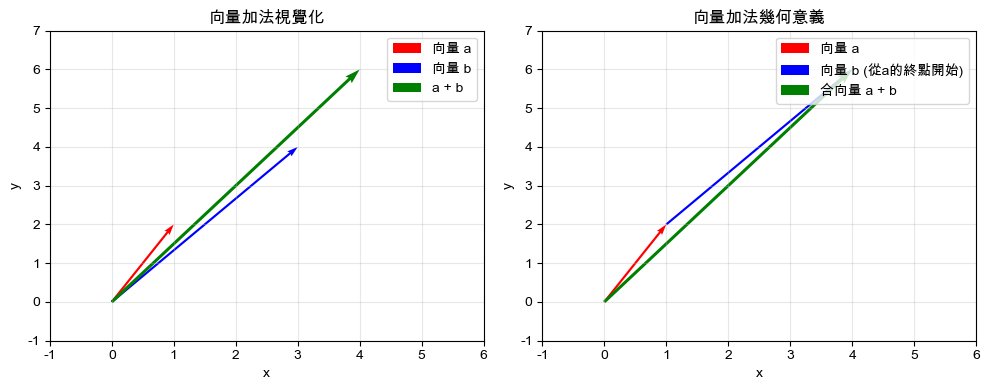

In [21]:
vector_1d = np.array([1])
vector_2d = np.array([3,4]) # 在2D平面上的點(3,4)
vector_3d = np.array([1,2,3]) #在3D空間中的點(1,2,3)
vector_features = np.array([299,4.5,2000]) # 商品特徵：[價格, 評分, 銷量] = [299, 4.5, 1200]



print(f"2D向量: {vector_2d}")
print(f"3D向量: {vector_3d}")
print(f"特徵向量 [價格, 評分, 銷量]: {vector_features}")


print(f"1d向量維度: {vector_1d.ndim}")
print(f"\n2D向量維度:{vector_2d.ndim}")
print(f"2D向量長度: {len(vector_2d)}")
print(f"2D向量形狀: {vector_2d.shape}")

print(f"\n3D向量維度:{vector_3d.ndim}")
print(f"3D向量長度: {len(vector_3d)}")
print(f"3D向量形狀: {vector_3d.shape}")

# ==========================================
# 2. 向量加法
# 規則：對應元素相加
# 幾何意義：向量首尾相接
# ==========================================
print("\n\n2. 向量加法")
print("-" * 30)

a = np.array([1,2])
b = np.array([3,4])

vector_sum = a+b
print(f"a + b = {vector_sum}")

# 視覺化向量加法
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.quiver(0, 0, a[0], a[1], angles='xy', scale_units='xy', scale=1, color='red', width=0.005, label='向量 a')
plt.quiver(0, 0, b[0], b[1], angles='xy', scale_units='xy', scale=1, color='blue', width=0.005, label='向量 b')
plt.quiver(0, 0, vector_sum[0], vector_sum[1], angles='xy', scale_units='xy', scale=1, color='green', width=0.007, label='a + b')
plt.xlim(-1, 6)
plt.ylim(-1, 7)
plt.grid(True, alpha=0.3)
plt.legend()
plt.title('向量加法視覺化')
plt.xlabel('x')
plt.ylabel('y')

# 展示向量加法的幾何意義（向量首尾相接）
plt.subplot(1, 2, 2)
plt.quiver(0, 0, a[0], a[1], angles='xy', scale_units='xy', scale=1, color='red', width=0.005, label='向量 a')
plt.quiver(a[0], a[1], b[0], b[1], angles='xy', scale_units='xy', scale=1, color='blue', width=0.005, label='向量 b (從a的終點開始)')
plt.quiver(0, 0, vector_sum[0], vector_sum[1], angles='xy', scale_units='xy', scale=1, color='green', width=0.007, label='合向量 a + b')
plt.xlim(-1, 6)
plt.ylim(-1, 7)
plt.grid(True, alpha=0.3)
plt.legend()
plt.title('向量加法幾何意義')
plt.xlabel('x')
plt.ylabel('y')

plt.tight_layout()
plt.show()




3. 純量乘法
------------------------------
原向量 a: [1 2]
純量: 2
2 × a = [2 4]


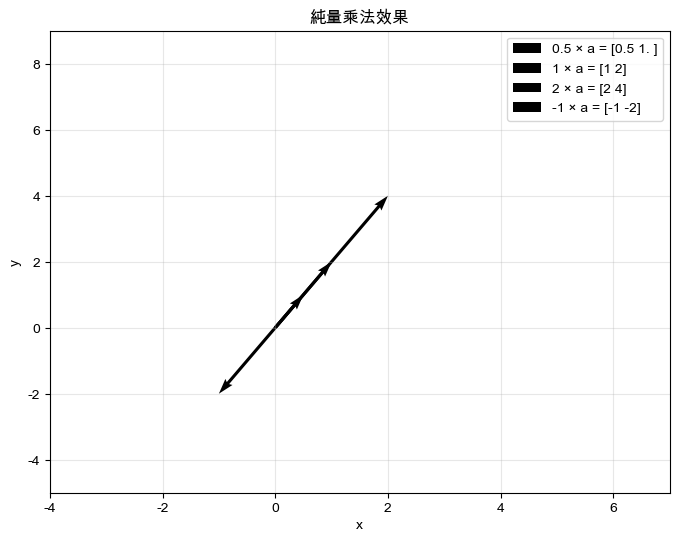

In [24]:
# ==========================================
# 3. 純量乘法
# 規則：每個元素都乘以純量
# 幾何意義：改變向量的長度，方向保持不變（負數時反向）
# ==========================================
print("\n\n3. 純量乘法")
print("-" * 30)

scalar = 2
scaled_vector= scalar * a

print(f"原向量 a: {a}")
print(f"純量: {scalar}")
print(f"{scalar} × a = {scaled_vector}")


# 不同純量的效果
scalars = [0.5, 1, 2, -1]
plt.figure(figsize=(8, 6))

for i ,s in enumerate(scalars):
    scaled = s * a
    plt.quiver(0, 0, scaled[0], scaled[1], angles='xy', scale_units='xy', scale=1, width=0.005, label=f'{s} × a = {scaled}')

plt.xlim(-4, 7)
plt.ylim(-5, 9)
plt.grid(True, alpha=0.3)
plt.legend()
plt.title('純量乘法效果')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


### 點積（內積）
- 定義：a · b = a₁×b₁ + a₂×b₂ + ... + aₙ×bₙ (向量維度必須相同)
- 計算： 
a = [3, 4]
b = [1, 2]
a · b = 3×1 + 4×2 = 3 + 8 = 11  


- 幾何意義： 
    - a · b = |a| × |b| × cos(θ)，其中θ是兩向量夾角
    - 點積為0 → 向量垂直
    - 點積為正 → 夾角小於90°
    - 點積為負 → 夾角大於90°


In [26]:
# ==========================================
# 4. 點積（內積）
# ==========================================
print("\n\n4. 點積（內積）")
print("-" * 30)

a = np.array([1,2])
b = np.array([3,4])

# 1*3 + 2*4 = 11
print(f"a,b內積:{np.dot(a,b)}")






4. 點積（內積）
------------------------------
a,b內積:11


### 向量長度（模）
- 公式：|a| = √(a₁² + a₂² + ... + aₙ²)  
- 例子：  
a = [3, 4]    
|a| = √(3² + 4²) = √(9 + 16) = √25 = 5

In [17]:
matrix_a = np.matrix([[5,6],[7,8]])
print(type(matrix_a))
matrix_a

print(matrix_a.size)
print(matrix_a.shape)

<class 'numpy.matrix'>
4
(2, 2)
